In [2]:
import pandas as pd
session_folder = r'D:\Faks\AES_projekat\REPO\ssvep-bci\data_collection\recording\first_recording\gui\OpenBCISession_2023-05-03_19-37-36' + '\\'
df1 = pd.read_csv(session_folder + 'BrainFlow-RAW_2023-05-03_19-37-36_1.csv', sep='\t', header=None)
df2 = pd.read_csv(session_folder + 'OpenBCI-RAW-2023-05-03_19-39-53.txt', skiprows=4)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Faks\\AES_projekat\\REPO\\ssvep-bci\\data_collection\\recording\\first_recording\\gui\\OpenBCISession_2023-05-03_19-37-36\\BrainFlow-RAW_2023-05-03_19-37-36_1.csv'

In [47]:
print(df2.shape, df1.shape)

(39386, 16) (39392, 15)


In [50]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,-977.800583,-121.339184,-310.086325,-301.529434,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0
1,1.0,-966.767878,22.029881,-166.133836,-165.412035,0.000,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0
2,1.0,-959.759306,20.982709,-240.894436,-244.641816,0.000,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0
3,2.0,-965.062484,-123.512066,-364.105440,-352.863301,0.016,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0
4,2.0,-963.951734,-114.308172,-301.473335,-298.997522,0.016,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0


In [51]:
df2.head()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,Accel Channel 0,Accel Channel 1,Accel Channel 2,Other,Other.1,Other.2,Other.3,Other.4,Timestamp,Other.5,Timestamp (Formatted)
0,0.0,-977.800583,-121.339184,-310.086325,-301.529434,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0,2023-05-03 19:39:53.977
1,1.0,-966.767878,22.029881,-166.133836,-165.412035,0.000,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0,2023-05-03 19:39:53.990
2,1.0,-959.759306,20.982709,-240.894436,-244.641816,0.000,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0,2023-05-03 19:39:53.990
3,2.0,-965.062484,-123.512066,-364.105440,-352.863301,0.016,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0,2023-05-03 19:39:54.007
4,2.0,-963.951734,-114.308172,-301.473335,-298.997522,0.016,0.032,0.0,0.0,0.0,0.0,0.0,0.0,1.683136e+09,0.0,2023-05-03 19:39:54.007


In [50]:
import numpy as np

data_path = r'D:\Faks\AES_projekat\REPO\ssvep-bci\data_collection\recorded_data\2023-05-10\test_session\01-21-56\trial_1.csv'

df = pd.read_csv(data_path)
# remove unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.head())
print(df.shape)
# group by blink_freq, and convert each group to numpy array witout blink_freq column
df = df.groupby('blink_freq').apply(lambda x: x.to_numpy().transpose()[:, 1:])
data = np.array(df.tolist())
print(data.shape)  # (n_freqs, n_channels+1, n_samples)

   blink_freq       ch1       ch2       ch3       ch4  timestamp
0         0.0  0.062020  0.192321  0.651850  0.694744   0.032257
1         0.0  0.934680  0.801309  0.941493  0.277527   0.296622
2         0.0  0.078328  0.607188  0.084213  0.522388   0.371790
3         0.0  0.460409  0.254955  0.461073  0.726979   0.117447
4         0.0  0.204625  0.487774  0.786147  0.068227   0.325580
(2048, 6)
(4, 6, 511)


In [ ]:
print(df.shape)
print(df[0].shape)
# make array from colmns
df = np.array(df.tolist())
df.shape

In [18]:
import pandas as pd

path = r'D:\Faks\AES_projekat\REPO\ssvep-bci\data_collection\recorded_data\2023-05-10\test_session\17-05-48\trial_0.csv'

df = pd.read_csv(path)
df = df.groupby('blink_freq').apply(lambda x: x.to_numpy().transpose()[:, 1:])
df.iloc[3].shape

(7, 399)

In [49]:
1683730225.9579031 - 1683730223.7339244

2.2239787578582764

In [53]:
1683730225.9579031 - 1683730225.7894974

0.16840577125549316

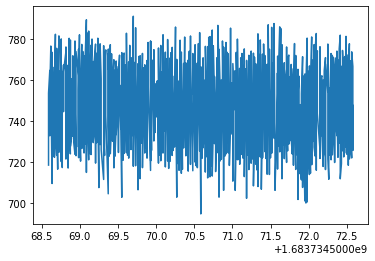

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# interactive plot mode
plt.ion()


data_folder = r'D:\Faks\AES_projekat\REPO\ssvep-bci\data_collection\recorded_data\2023-05-10\teodora\18-02-46'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

data = pd.read_csv(os.path.join(data_folder, csv_files[0]))
data.head()
time = data['timestamp'].to_numpy()
# group by blink_freq
data = data.groupby('blink_freq').apply(lambda x: x.to_numpy().transpose()[:, 1:])

plt.plot(data.iloc[0][-1][200:], data.iloc[0][2][200:])
plt.show()

In [15]:
data.iloc[0][2]

array([-27.26387068,   6.35409002,  32.66054631, ..., 725.54246135,
       742.06533936, 747.48445439])